# Introduction to Probability: Frequencies, Expectations and Statistics
## Statistics for Data Science
---

## Are all probability spaces equiprobable?

In classical probability we are required to represent the event space equiprobably... this can be quite challenging.

Consider the sequential events: a dice roll followed by either a coin flip (first even) or another dice roll (first odd). (This maps to any series of events with differently-sized outcome spaces.)


In [1]:
die = set(range(1, 7))
coin = set("HT")

O = { r : (coin if r %2 == 0 else die) for r in die }; O

{1: {1, 2, 3, 4, 5, 6},
 2: {'H', 'T'},
 3: {1, 2, 3, 4, 5, 6},
 4: {'H', 'T'},
 5: {1, 2, 3, 4, 5, 6},
 6: {'H', 'T'}}

Note this isn't equiprobable,

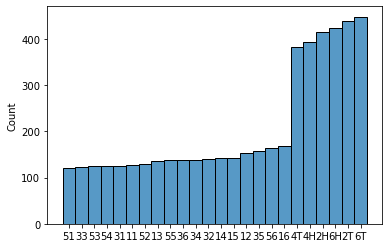

In [8]:
import seaborn as sns
from random import randint, choice

outcomes = []

for _ in range(5000):
    first = randint(1, 6)
    
    if first % 2 == 0:
        second = choice("HT")
    else:
        second = randint(1, 6)
    
    outcomes.append( f"{first}{second}")
    
sns.histplot(sorted(outcomes, key=outcomes.count));

We *can* encode outcomes in an equiprobable fasion. 


We need the conditional outcome spaces to have the same length, so rather than represent H/T as "HT" we can use a 0-1 vector of the right size,

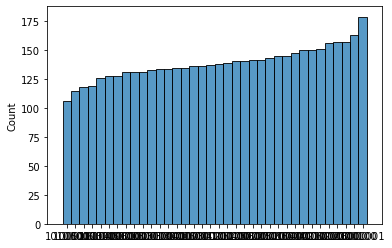

In [37]:
import seaborn as sns
from random import randint, choice

eqi_outcomes = []

for _ in range(5000):
    first = randint(1, 6)
    second = ["0"] * 6 
    second[randint(0, 5)] = "1"
    
    eqi_outcomes.append(f"{first}{''.join(second)}")
    
sns.histplot(sorted(eqi_outcomes, key=eqi_outcomes.count));

And to select Heads, we interpret "Head" as an even-numbered outcome on the second roll:

In [56]:
def IsH(first, second):
    return (int(first) % 2 == 0) and (second.index("1") % 2 == 0)
    
    
heads = { first +''.join(second) for first, *second in eqi_outcomes  if IsH(first, second) }
ospace = set(eqi_outcomes)

In [57]:
len(heads)/len(ospace)

0.25

In [58]:
heads

{'2000010',
 '2001000',
 '2100000',
 '4000010',
 '4001000',
 '4100000',
 '6000010',
 '6001000',
 '6100000'}

## Can we take a more sane approach to non-equiprobable spaces?

Frequentist statistics is, in part, designed to enable us to cope when we cannot determine the ("real" equiprobable) outcome space. We *do statistics*, ie., work with real-numbers, rather than events. 

In this case frequencies:

In [92]:
from collections import Counter 
from fractions import Fraction as F; F.__repr__ = F.__str__

N = 5000
outcomes = []
for _ in range(N):
    first = randint(1, 6)
    
    if first % 2 == 0:
        second = choice("HT")
    else:
        second = randint(1, 6)
    
    outcomes.append( f"{first}{second}")
    
pmf5k = { event : F(freq)/N for event, freq in Counter(outcomes).items() }

In [93]:
pmf5k

{'2H': 411/5000,
 '2T': 109/1250,
 '32': 123/5000,
 '4H': 401/5000,
 '11': 33/1000,
 '6T': 407/5000,
 '34': 77/2500,
 '13': 137/5000,
 '35': 151/5000,
 '52': 137/5000,
 '4T': 419/5000,
 '33': 139/5000,
 '12': 13/500,
 '16': 73/2500,
 '6H': 101/1250,
 '31': 143/5000,
 '36': 29/1000,
 '14': 147/5000,
 '56': 18/625,
 '53': 31/1250,
 '55': 16/625,
 '51': 137/5000,
 '15': 73/2500,
 '54': 63/2500}

## What is a frequentist interpretation of probability?

We imagine we can compute a probability (via a model), or otherwise obtain it from an experiment -- by considering it's long-run frequency,

In [90]:
from collections import Counter 

Ns = range(10, 20_000, 1_000)
limits = []
for N in Ns:
    outcomes = []
    for _ in range(N):
        first = randint(1, 6)
        if first % 2 == 0:
            second = choice("HT")
        else:
            second = randint(1, 6)
        outcomes.append( f"{first}{second}")
    
    limits.append({ event : F(freq)/N for event, freq in Counter(outcomes).items() })
    
p_4H = { n : float(pmf["4H"]) for n, pmf in zip(Ns, limits) }

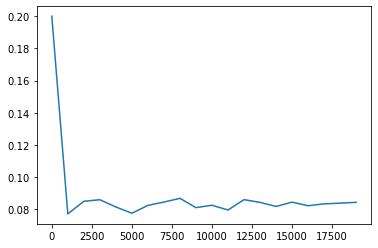

In [91]:
sns.lineplot(x=list(p_4H.keys()), y=list(p_4H.values()))

Specifically,

$P(E) = \lim_{N \rightarrow \infty} \frac{\#E}{\#N}$

## What is Statistics?

When we cannot work with events and outcome spaces directly we enter the world of real-numbers and random-variables called "Statistics".

Here we are rarely trying to compute a single probability, typically rather, probability plays a weighting role on outcomes of interest. The weighted average of such quantities is called an *expectation*. 

Statistics has also been called the domain where we "take expectations", that is, consider these weighted-averages of random variables.

## What is the value of a Random Variable, on avearge?

Suppose we win the face value of any dice roll, and 5p for heads and 0p for tails...

What is the *expected* winnings (ie., for all outcomes)?

In [101]:
def win(outcome):
    first, second = outcome
    
    return int(first) + int(second.replace('H', '5').replace('T', '5'))

win('2H')

7

In [103]:
from statistics import mean

In [114]:
Q = [ (win(outcome), float(prob)) for outcome, prob in pmf5k.items() ]

mean(pX * X  for X, pX in Q)

0.32095

## What is an Expectation?

$$\mathbb{E}_Q[X]$$

$$\mathbb{E}_Q[X] = \sum_{x \in X, p_x \in Q} x \cdot p_x  $$

$$\mathbb{E}_Q[X] = \int x \cdot p(x) dx $$

In [149]:
from random import sample

In [150]:
probX = {
        1.5 : 0.6,
        2.6 : 0.4
    }


Dx = [1.5] * 600 + [2.6] * 400

X = sample(Dx, 20)

In [155]:
mean(Dx)

1.94

In [157]:
(1.5 * 0.6) + (2.6 * 0.4)

1.94

In [158]:
mean(X)

1.83